# Creation of cross-validation splits

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import seaborn as sns 
from zipfile import ZipFile
from pathlib import Path

### Data import

In [2]:
df = pd.read_csv("../data/data_train.csv")
train_df = df.Id.str.split("_", expand=True)
train_df.columns = ["User", "Movie"]
train_df["Prediction"] = df.Prediction
train_df

,User,Movie,Prediction
0,r44,c1,4
1,r61,c1,3
2,r67,c1,4
3,r72,c1,3
4,r86,c1,5
...,...,...,...
1176947,r9990,c1000,4
1176948,r9992,c1000,5
1176949,r9994,c1000,3
1176950,r9997,c1000,4


In [3]:
df = pd.read_csv("../data/sampleSubmission.csv")
test_df = df.Id.str.split("_", expand=True)
test_df.columns = ["User", "Movie"]
test_df["Prediction"] = df.Prediction
test_df

,User,Movie,Prediction
0,r37,c1,3
1,r73,c1,3
2,r156,c1,3
3,r160,c1,3
4,r248,c1,3
...,...,...,...
1176947,r9974,c1000,3
1176948,r9977,c1000,3
1176949,r9978,c1000,3
1176950,r9982,c1000,3


### Check whether test data is skewed

spoiler: observations allow to assume u.a.r. sampling

In [4]:
user_counts = pd.DataFrame({"train": train_df.User.value_counts(), "test": test_df.User.value_counts()})
user_counts.index = user_counts.index.str.lstrip("r").astype(int)
user_counts

,train,test
1,23,32
10,107,126
100,165,165
1000,438,418
10000,114,87
...,...,...
9995,44,69
9996,183,159
9997,129,144
9998,41,47


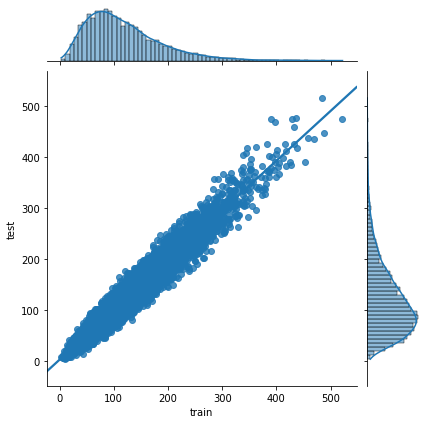

In [5]:
sns.jointplot(x="train", y="test", data=user_counts,
                  kind="reg", truncate=False)

In [6]:
movie_counts = pd.DataFrame({"train": train_df.Movie.value_counts(), "test": test_df.Movie.value_counts()})
movie_counts.index = movie_counts.index.str.lstrip("c").astype(int)
movie_counts

,train,test
1,340,319
10,2622,2599
100,742,662
1000,1492,1462
101,1270,1308
...,...,...
995,2299,2258
996,1231,1288
997,1029,1042
998,472,451


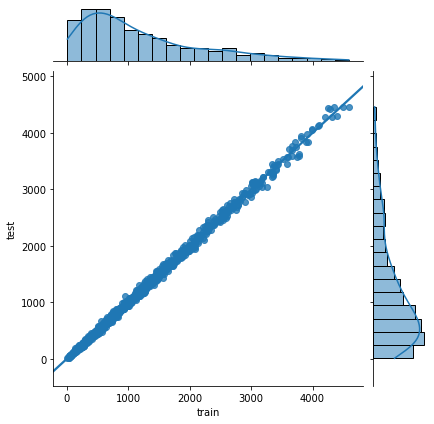

In [7]:
sns.jointplot(x="train", y="test", data=movie_counts,
                  kind="reg", truncate=False)

### Cross validation

In [8]:
df = pd.read_csv("../data/data_train.csv")
CV = KFold(n_splits=5, shuffle=True, random_state=42)
for i, (train_index, test_index) in enumerate(CV.split(df)):
    print("TRAIN:", train_index, "TEST:", test_index)
    df.iloc[train_index].to_csv(f"../data/train_split_{i}.csv", index=False)
    df.iloc[test_index].to_csv(f"../data/test_split_{i}.csv", index=False)

TRAIN: [      0       1       3 ... 1176947 1176948 1176951] TEST: [      2       5       7 ... 1176941 1176949 1176950]
TRAIN: [      1       2       4 ... 1176949 1176950 1176951] TEST: [      0       3      10 ... 1176936 1176943 1176945]
TRAIN: [      0       1       2 ... 1176948 1176949 1176950] TEST: [      6       9      11 ... 1176929 1176946 1176951]
TRAIN: [      0       1       2 ... 1176949 1176950 1176951] TEST: [      4      15      16 ... 1176934 1176935 1176948]
TRAIN: [      0       2       3 ... 1176949 1176950 1176951] TEST: [      1       8      21 ... 1176942 1176944 1176947]


In [9]:
file_name = "../data/cross_validation.zip"
with ZipFile(file_name, "w") as zip_file:
    for i in range(5):
        zip_file.write(f"../data/train_split_{i}.csv", f"train_split_{i}.csv")
        zip_file.write(f"../data/test_split_{i}.csv", f"test_split_{i}.csv")